In [2]:
import pandas as pd
import numpy as np
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..',"..")))

In [3]:
from src.analysis.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from src.analysis.missing_values_analysis import SimpleMissingValuesAnalysis
from src.analysis.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from src.analysis.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from src.analysis.multivariate_analysis import SimpleMultivariateAnalysis


# Loading Training Data

In [4]:
train_data_path = os.path.abspath(os.path.join(os.getcwd(),"..","..","extracted_data","train.csv"))
train_df = pd.read_csv(train_data_path)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Loading Test Data

In [5]:
test_data_path = os.path.abspath(os.path.join(os.getcwd(),"..","..","extracted_data","test.csv"))
test_df = pd.read_csv(test_data_path)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Step 1: Basic Data Inspection

In [6]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(train_df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460

## Switching strategy to Summary Statistics Inspection

In [7]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(train_df)


Summary Statistics (Numerical Features):
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904  

# Step 2: Missing Values Analysis


Missing Values Count by Column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Visualizing Missing Values...


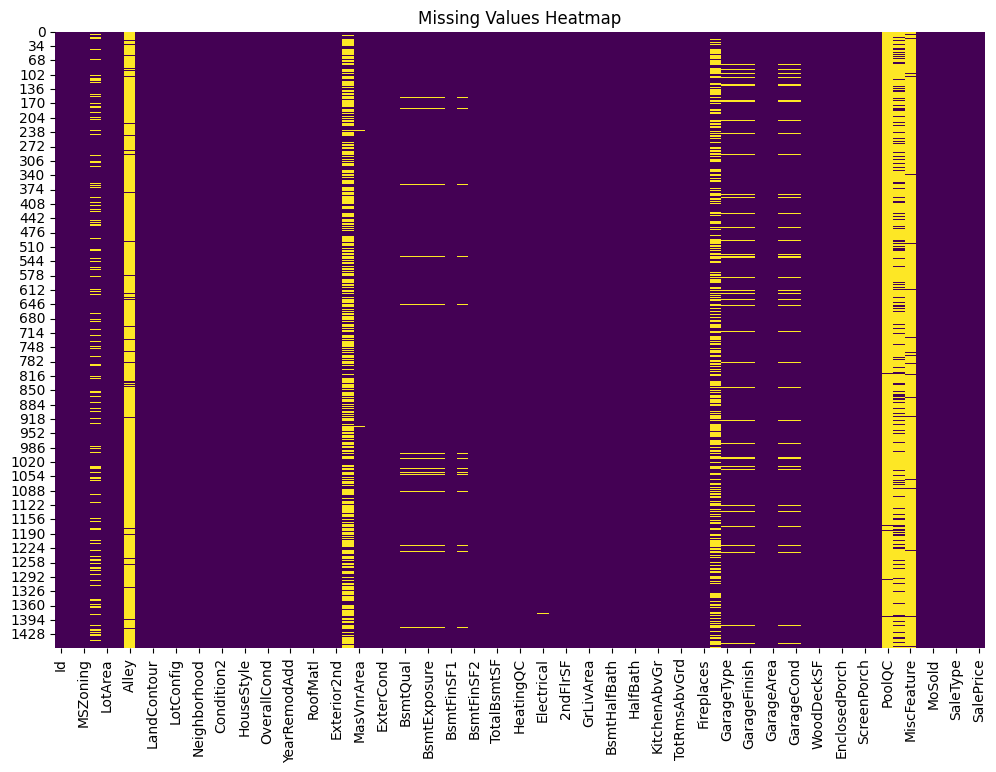

In [8]:
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(train_df)

## Insights
#### **1. Data Types and Non-null Counts:**
- The dataset contains **1460 entries** and **81 columns**.
- **Data Types**: There are 3 columns with `float64` data type, 35 columns with `int64` data type, and 43 columns with `object` data type.
  - **Numerical Features**: These include features like `Lot Frontage`, `Lot Area`, `Overall Qual`, `Year Built`, etc.
  - **Categorical Features**: Features like `MS Zoning`, `Street`, `Neighborhood`, `Bldg Type`, etc., are categorical.


  #### **2. Summary Statistics:**
- **Numerical Features**:
  - The target variable `SalePrice` has a mean of **$180,921** with a standard deviation of **$79,442** and a max of **$755, 000**, indicating a significant spread in house prices.
  - `Overall Qual` (quality of the house) ranges from **1 to 10**, with a mean of **6.09**, showing a relatively high quality on average.
  - `Year Built` ranges from **1872 to 2010**, indicating that the dataset includes both very old and relatively new houses.
  - `Lot Area` has a wide range, with some extreme outliers (maximum of **215,245 sq ft**), which might indicate large properties given that the (minimum is **1, 300 sq ft**).
  - The distribution of `Gr Liv Area` (above ground living area) shows a mean of **1499 sq ft** with a wide range, which could significantly impact `SalePrice`.

- **Categorical Features**:
  - **Neighborhood** has **28 unique values**, with `NAmes` being the most common, suggesting some neighborhoods might dominate the dataset.
  - **MS Zoning** is mostly `RL` (residential low-density), with **7 unique zoning types**.
  - `Alley` has a high frequency of missing values (discussed below).
  - Several features related to basements, garages, and exterior quality vary significantly, which will be crucial in predicting `SalePrice`.


- **Categorical Features**:
  - **Neighborhood** has **28 unique values**, with `NAmes` being the most common, suggesting some neighborhoods might dominate the dataset.
  - **MS Zoning** is mostly `RL` (residential low-density), with **5 unique zoning types**.
  - `Alley` has a high frequency of missing values (discussed below).
  - Several features related to basements, garages, and exterior quality vary significantly, which will be crucial in predicting `SalePrice`.

#### **3. Missing Values Analysis:**
- **Columns with Significant Missing Values**:
  - `Alley` has **1369 missing values** (93.76% missing), making it almost unusable without imputation or transformation.
  - `Pool QC` (pool quality) has **1453 missing values** (99.5% missing), indicating that very few houses have pools or errors in data collection.
  - `Fence` has **1179 missing values** (80.75% missing), suggesting that many houses do not have a fence or it was not recorded.
  - `Misc Feature` has **1406 missing values** (96.3% missing), indicating that most houses do not have miscellaneous features, or they were not recorded.

- **Columns with Moderate Missing Values**:
  - `Garage Type`, `Garage Yr Blt`, `Garage Finish`, `Garage Qual`, `Garage Cond` each have **81 missing values** (~5.5%), likely corresponding to houses without garages.
  - `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2` each have **around 38 missing values** (~2.6%), likely representing houses without basements.
  - `Mas Vnr Type` (masonry veneer type) has **872 missing values** (~59.7%), and `Mas Vnr Area` has **8 missing values** (~5.5%). This might indicate many houses do not have masonry veneer.

- **Single Missing Values**:
  - Several features, such as `BsmtFin SF 1`, `Total Bsmt SF`, `Electrical`, `Garage Cars`, `Garage Area`, etc., have only one or two missing values, which can likely be imputed without much impact.

### **Issues to be Addressed Later**

1. **Handling Missing Data:**
   - **Significant Missing Values**: Columns like `Alley`, `Pool QC`, `Fence`, and `Misc Feature` have a very high percentage of missing data. Decisions need to be made whether to:
     - Drop these columns entirely, as they might not add significant value.
     - Impute missing values with a placeholder (e.g., "None" or "No Pool") to retain them in the analysis.
   - **Moderate Missing Values**: Features related to basements and garages will require careful handling. Missing values could be filled with "No Basement" or "No Garage" for categorical features, and zeros for numerical ones.
   - **Single Missing Values**: These can likely be filled with the mode or mean for categorical and numerical features, respectively.

2. **Outlier Detection and Handling**:
   - Features like `Lot Area`, `Gr Liv Area`, and `SalePrice` show a significant range, indicating potential outliers. These will need to be detected and handled appropriately to avoid skewing model predictions.

3. **Categorical Encoding**:
   - Categorical features like `Neighborhood`, `MS Zoning`, `Bldg Type`, and `Exterior 1st` do not many unique values. Decisions need to be made on how to encode these (e.g., one-hot encoding, label encoding, or frequency encoding) based on their relationship with the target variable.

4. **Feature Engineering**:
   - Based on the insights, certain features might need to be engineered (e.g., combining related features, creating interaction terms, or transforming skewed features) to better capture the relationships in the data.

5. **Correlation and Multicollinearity**:
   - Initial correlation analysis suggests that some features might be highly correlated with each other (e.g., basement-related features). This could lead to multicollinearity issues, which need to be addressed during feature selection.

# Step 3: Univariate Analysis

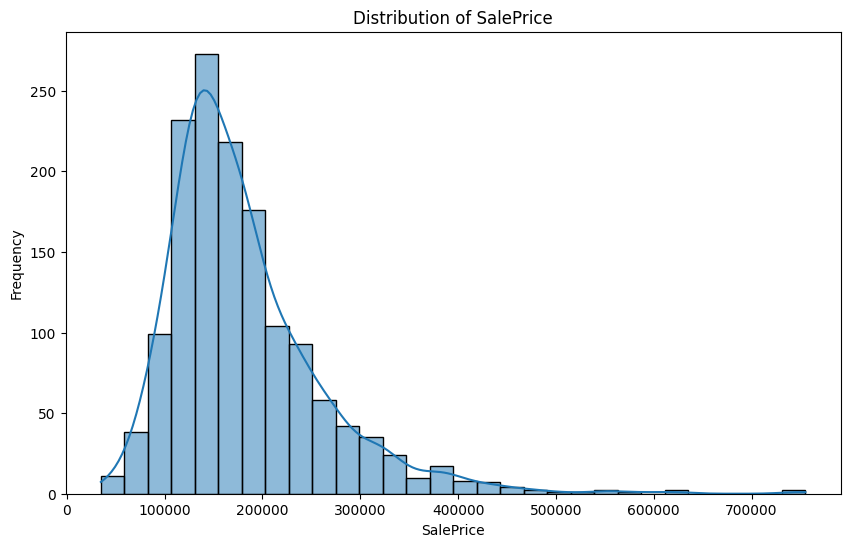

In [9]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'SalePrice')

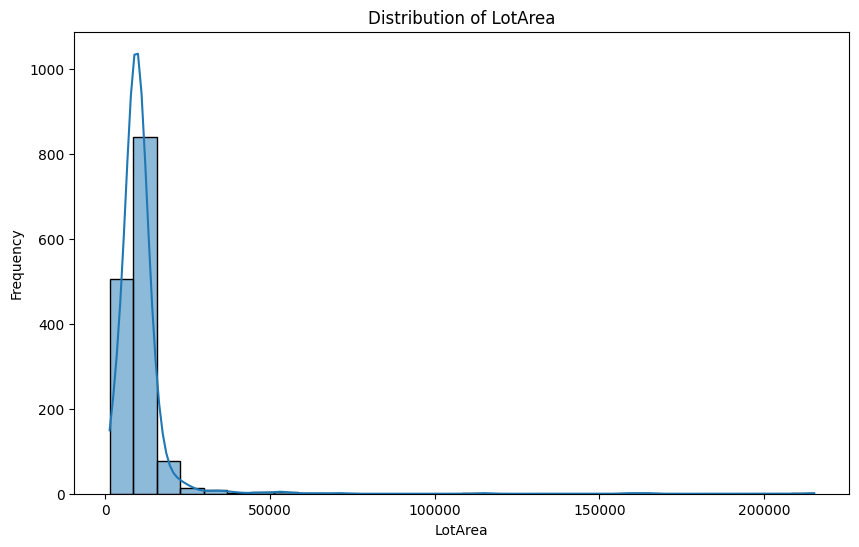

In [10]:
# Analyzing a Lot Area Feature
univariate_analyzer.set_strategy(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'LotArea')

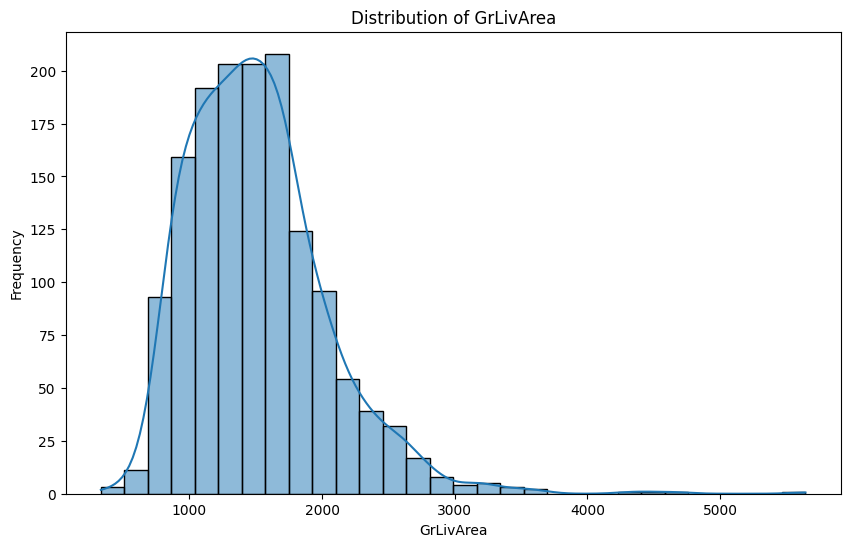

In [11]:

# Analyzing a Ground Living Area Feature
univariate_analyzer.set_strategy(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'GrLivArea')

/Users/ianmadhara/Desktop/In-Class/Second Semester Masters First Year 2025/Predictive Models/Final Project/house-price-predictions/src/analysis/univariate_analysis.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


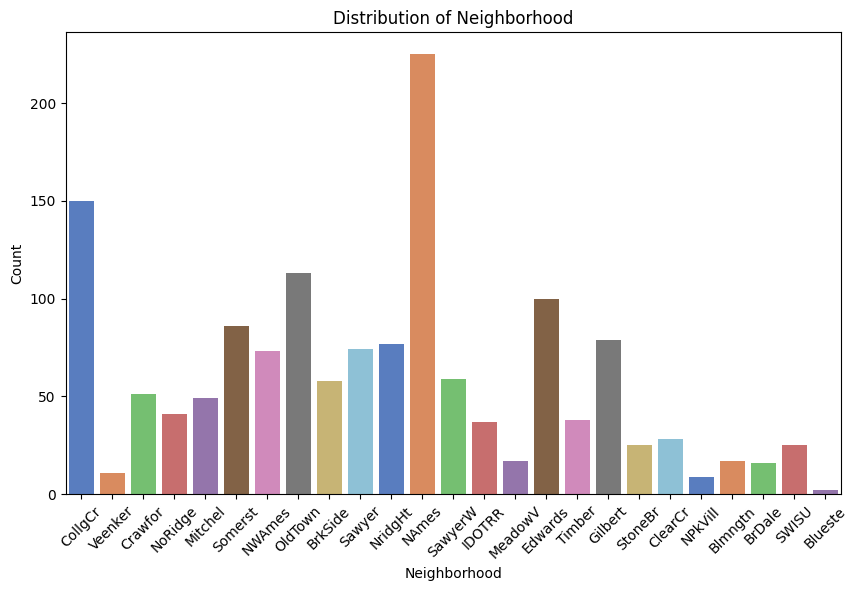

In [12]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(train_df, 'Neighborhood')

# Step 4: Bivariate Analysis

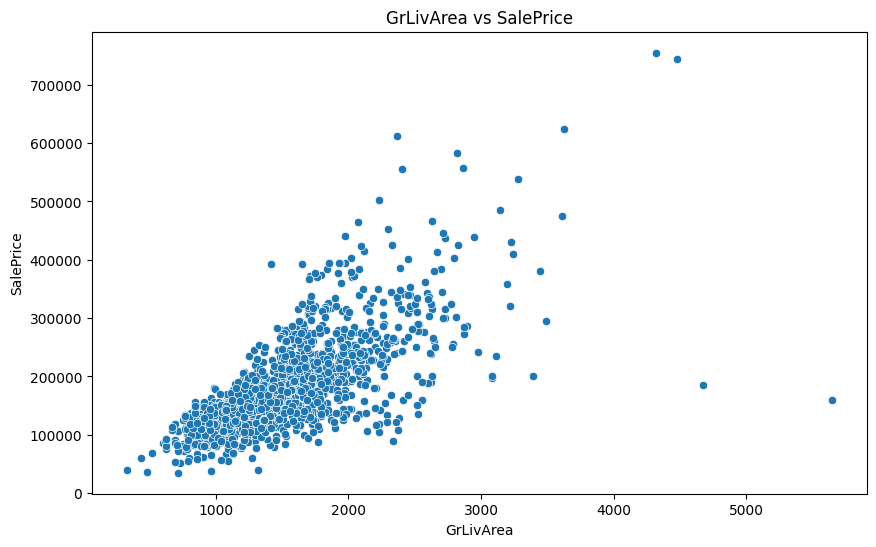

In [13]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'GrLivArea', 'SalePrice')

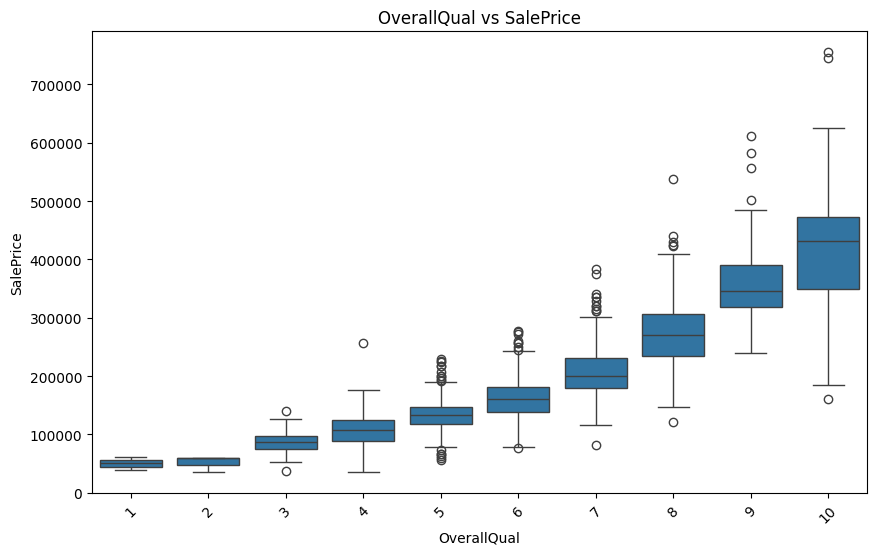

In [14]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(train_df, 'OverallQual', 'SalePrice')

### **Insights from Univariate and Bivariate Analysis**

#### **Step 3: Univariate Analysis**

1. **SalePrice Distribution (Numerical Feature)**:
   - **Insight**: The distribution of `SalePrice` is positively skewed, with the majority of house prices falling between $100,000 and $250,000. The peak frequency is around the $200,000 mark.
   - **Implication**: This skewness suggests that most homes in the dataset are relatively affordable, with fewer high-end properties. The long tail on the right side indicates a small number of more expensive homes, which may need special consideration during modeling (e.g., applying a log transformation to normalize the distribution).

2. **Neighborhood Distribution (Categorical Feature)**:
   - **Insight**: The `Neighborhood` feature shows a varied distribution, with `NAmes` being the most common neighborhood, followed by `CollgCr` and `OldTown`. Some neighborhoods have very few observations.
   - **Implication**: The high frequency of certain neighborhoods suggests that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together.

#### **Step 4: Bivariate Analysis**

1. **Gr Liv Area vs. SalePrice (Numerical vs. Numerical)**:
   - **Insight**: There is a strong positive correlation between `Gr Liv Area` (Above Ground Living Area) and `SalePrice`, indicating that larger homes generally sell for higher prices. The relationship appears mostly linear, but there are a few outliers, especially at higher `Gr Liv Area` values.
   - **Implication**: This linear relationship confirms that `Gr Liv Area` is likely a strong predictor of `SalePrice`. However, the presence of outliers (large homes with lower than expected prices) might require further investigation to determine whether they should be treated or removed.

2. **Overall Qual vs. SalePrice (Categorical vs. Numerical)**:
   - **Insight**: There is a clear positive relationship between `Overall Qual` (Overall Quality) and `SalePrice`, with higher quality ratings associated with significantly higher prices. The box plot shows increasing medians and ranges as quality improves, with some variability in each category.
   - **Implication**: `Overall Qual` is another strong predictor of `SalePrice`. The consistent increase in sale price with higher quality ratings suggests that homebuyers highly value quality. The variability within each category might be due to other factors influencing price, such as location or specific features not captured by `Overall Qual`.

### **Summary**:
- **Key Predictors**: Both `Gr Liv Area` and `Overall Qual` are strong predictors of `SalePrice`. These features should be emphasized in any predictive models.
- **Data Distribution**: The positive skew in `SalePrice` and the wide range of values for both `Gr Liv Area` and `Overall Qual` indicate the need for careful data preprocessing, including potential normalization or transformation of features.
- **Outliers**: Outliers in the relationship between `Gr Liv Area` and `SalePrice` need to be examined closely, as they may represent special cases (e.g., luxury homes) that could skew the model if not properly addressed.

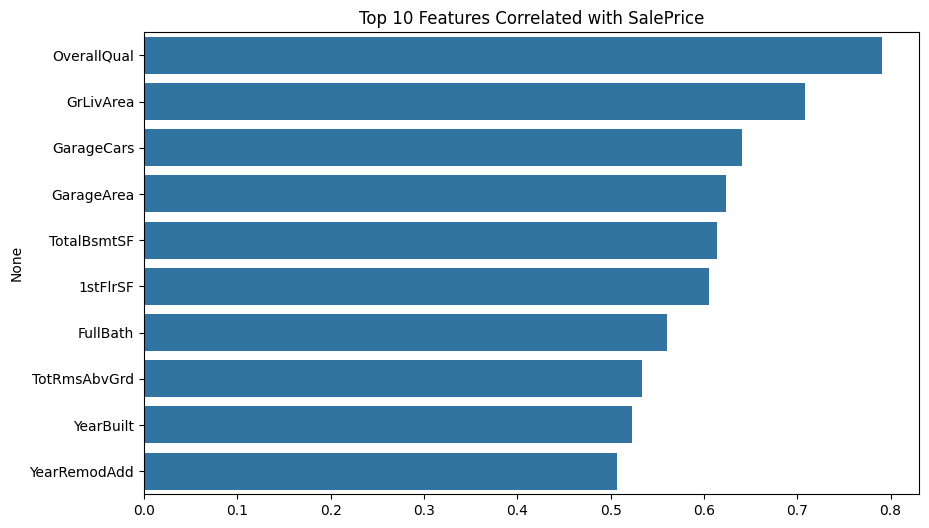

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns


corr = train_df.corr(numeric_only=True)
top_corr = corr["SalePrice"].abs().sort_values(ascending=False)[1:11]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 Features Correlated with SalePrice")
plt.show()

# Step 5: Multivariate Analysis

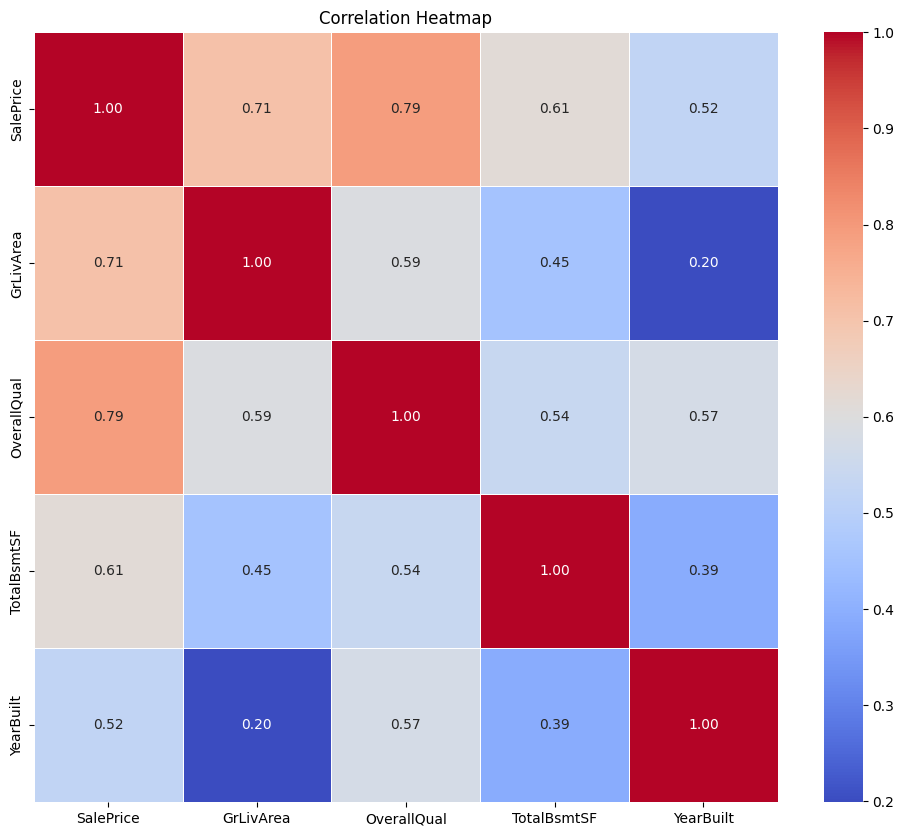

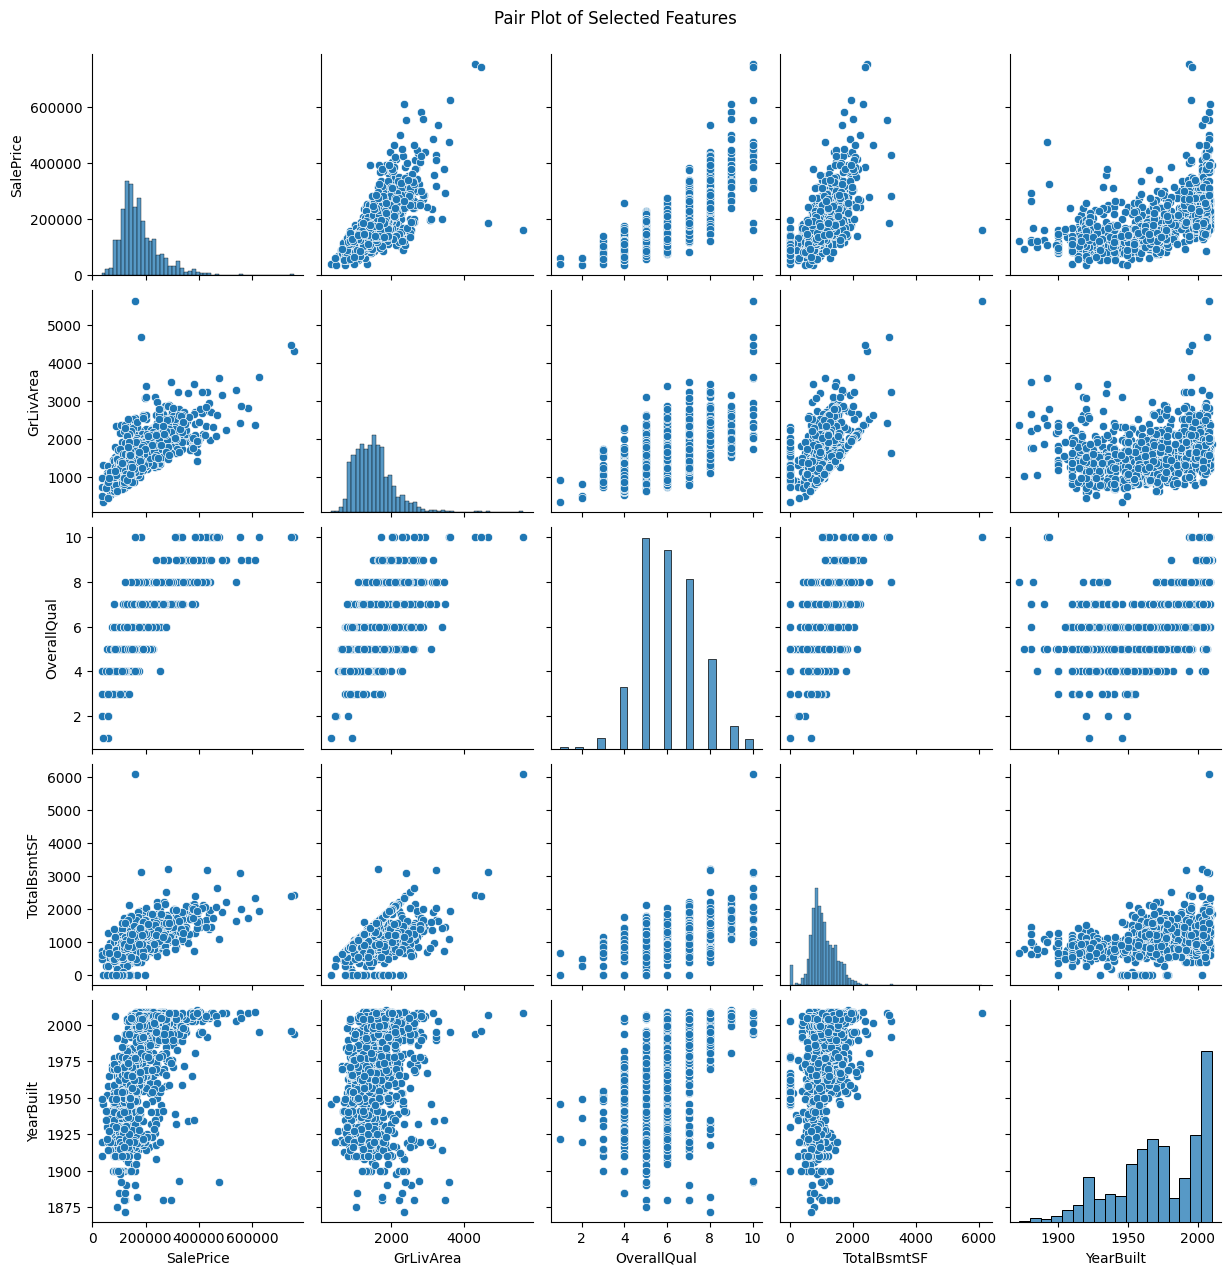

In [17]:
# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = train_df[['SalePrice', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

### **Insights from Multivariate Analysis**

#### **Correlation Heatmap:**
1. **SalePrice and Overall Qual**:
   - **Insight**: The highest correlation observed is between `SalePrice` and `Overall Qual` (0.80). This strong positive correlation indicates that the overall quality of the house is a significant determinant of its price. 
   - **Implication**: `Overall Qual` should be considered a key predictor in the model. The high correlation suggests that this feature explains a substantial portion of the variance in house prices.

2. **SalePrice and Gr Liv Area**:
   - **Insight**: The correlation between `SalePrice` and `Gr Liv Area` (0.71) is also strong, indicating that larger homes generally have higher sale prices.
   - **Implication**: Similar to `Overall Qual`, `Gr Liv Area` is another critical predictor of `SalePrice`. This relationship aligns with the expectation that more living space increases a property's value.

3. **Total Bsmt SF**:
   - **Insight**: The correlation between `Total Bsmt SF` and `SalePrice` (0.63) is moderate, suggesting that the size of the basement contributes to the overall value but not as strongly as living area or quality.
   - **Implication**: `Total Bsmt SF` is an important feature, but it may require further exploration or interaction with other features to capture its full effect.

4. **Year Built**:
   - **Insight**: `Year Built` has a lower correlation with `SalePrice` (0.56). While newer homes tend to sell for more, this relationship is less pronounced than those with living area or quality.
   - **Implication**: The age of the house is a relevant factor but might be more meaningful when combined with other features like `Overall Qual` or `Remod/Add Year`.

#### **Pair Plot:**
1. **Linear Relationships**:
   - **Insight**: The pair plots confirm linear relationships between `SalePrice` and both `Gr Liv Area` and `Total Bsmt SF`, supporting their inclusion as linear predictors in the model.
   - **Implication**: These linear relationships suggest that linear models (or transformations) could effectively capture these predictors' contributions to `SalePrice`.

2. **Discrete Distribution of Overall Qual**:
   - **Insight**: `Overall Qual` appears as a discrete variable in the pair plots, with significant gaps between categories. This suggests that it is more ordinal in nature.
   - **Implication**: Given its ordinal nature, `Overall Qual` might be better treated as a categorical variable with ordered categories. This could improve the interpretability and performance of the model.

3. **Potential Multicollinearity**:
   - **Insight**: The strong correlations between `Gr Liv Area`, `Overall Qual`, and `Total Bsmt SF` suggest potential multicollinearity, which could inflate variance in model coefficients.
   - **Implication**: Multicollinearity should be checked using Variance Inflation Factor (VIF) analysis. If multicollinearity is confirmed, techniques like feature selection, regularization, or Principal Component Analysis (PCA) might be needed.

### **Issues to Address:**
1. **Multicollinearity**:
   - **Issue**: The high correlations between key predictors could lead to multicollinearity in regression models, which could skew the results and reduce model interpretability.
   - **Action**: Conduct VIF analysis to check for multicollinearity. If detected, consider removing or combining correlated features, using regularization techniques, or applying PCA to reduce dimensionality.

2. **Feature Engineering**:
   - **Issue**: Features like `Overall Qual`, which is ordinal, might benefit from specific treatment (e.g., encoding as an ordinal variable) rather than being treated as continuous.
   - **Action**: Consider encoding `Overall Qual` as an ordinal variable. Also, explore interactions between features like `Gr Liv Area` and `Total Bsmt SF` to capture more complex relationships.

3. **Outliers**:
   - **Issue**: The pair plots indicate potential outliers, especially in `Gr Liv Area` and `SalePrice`. These could be high-leverage points that unduly influence model performance.
   - **Action**: Identify and analyze outliers to determine if they should be removed or if the model should be adjusted to account for them (e.g., using robust regression techniques).